# Exercice : Analyse des employés d'une entreprise tech

## Partie 1 : Chargement et exploration

In [17]:
import pandas as pd
import numpy as np

# 1. Charger employees2.csv
df = pd.read_csv("employees2.csv")
# 2. Afficher les 5 premières lignes
print("Les 5 premières lignes sont :")
print(df.head())
print()

Les 5 premières lignes sont :
   Unnamed: 0  ID     Name   Age   Salary Department  Years_Experience Remote
0           0   1  Othmane   NaN      NaN         IT                 0    Yes
1           1   2    Ikram  22.0      NaN         HR                23    Yes
2           2   3      Bob   NaN      NaN         HR                26    Yes
3           3   4    Zineb  59.0  73665.0         HR                 3     No
4           4   5    David  57.0  59325.0    Finance                33     No



### Interprétation des premières lignes :
- Le dataset contient des informations sur les employés
- Colonnes principales : ID, Name, Age, Salary, Department, Years_Experience, Remote
- Présence de valeurs manquantes (NaN) dans certaines colonnes
- Types de données mixtes : numériques et textuelles

In [18]:
# 3. Vérifier types de données
print("Les types de données sont :")
print(df.dtypes)
print()

Les types de données sont :
Unnamed: 0            int64
ID                    int64
Name                 object
Age                 float64
Salary              float64
Department           object
Years_Experience      int64
Remote               object
dtype: object



In [19]:
# 4. Identifier valeurs manquantes
print("Les valeurs manquantes sont :")
print(df.isnull().sum())
print()

Les valeurs manquantes sont :
Unnamed: 0           0
ID                   0
Name                 0
Age                 49
Salary              44
Department           0
Years_Experience     0
Remote               0
dtype: int64



### Interprétation de l'exploration initiale :
- Types de données identifiés : float64 pour les nombres, object pour le texte
- Valeurs manquantes détectées dans les colonnes Age et Salary
- Nécessité de nettoyer les données avant l'analyse
- Structure du dataset adaptée pour l'analyse d'employés

## Partie 2 : Nettoyage des données

In [20]:
# 5. Remplacer Age manquant par médiane
df['Age'] = df['Age'].fillna(df['Age'].median())
print("Après remplacement des âges manquants par la médiane :")
print(df['Age'])
print()

Après remplacement des âges manquants par la médiane :
0     45.0
1     22.0
2     45.0
3     59.0
4     57.0
      ... 
95    45.0
96    45.0
97    45.0
98    42.0
99    32.0
Name: Age, Length: 100, dtype: float64



In [21]:
# 6. Remplacer Salaire manquant par moyenne par département
df['Salary'] = df['Salary'].fillna(df.groupby('Department')['Salary'].transform('mean'))
print("Après remplacement des salaires manquants par la moyenne par département :")
print(df['Salary'])
print()

Après remplacement des salaires manquants par la moyenne par département :
0     69930.000000
1     61659.733333
2     61659.733333
3     73665.000000
4     59325.000000
          ...     
95    82670.000000
96    59838.000000
97    45811.000000
98    73800.000000
99    70395.153846
Name: Salary, Length: 100, dtype: float64



In [22]:
# 7. Convertir colonnes numériques
numeric_cols = ['Age', 'Salary', 'Years_Experience']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

print("Types après conversion :")
print(df.dtypes)
print()

Types après conversion :
Unnamed: 0            int64
ID                    int64
Name                 object
Age                 float64
Salary              float64
Department           object
Years_Experience      int64
Remote               object
dtype: object



### Interprétation du nettoyage des données :
- Les âges manquants ont été remplacés par la médiane (45 ans) pour éviter l'impact des valeurs aberrantes
- Les salaires manquants ont été remplacés par la moyenne de chaque département pour une imputation plus précise
- La conversion des types de données garantit la cohérence pour les calculs numériques
- Le dataset est maintenant prêt pour l'analyse statistique

In [23]:
# 8. Remplacer Yes/No par Oui/Non dans Remote
df['Remote'] = df['Remote'].replace({'Yes': 'Oui', 'No': 'Non'})

print("Valeurs Remote après remplacement :")
print(df['Remote'].value_counts())
print()

Valeurs Remote après remplacement :
Remote
Oui    55
Non    45
Name: count, dtype: int64



In [25]:
# 9. Créer colonne Ancienneté_Catégorie (Junior/Intermédiaire/Senior/Expert)
def classer_anciennete(x):
    if x < 3:
        return 'Junior'
    elif 3 <= x <= 7:
        return 'Intermédiaire'
    elif 8 <= x <= 15:
        return 'Senior'
    else:
        return 'Expert'

df['Ancienneté_Catégorie'] = df['Years_Experience'].apply(classer_anciennete)
print("Catégories d'ancienneté :")
print(df['Ancienneté_Catégorie'].value_counts())

Catégories d'ancienneté :
Ancienneté_Catégorie
Expert           58
Senior           24
Intermédiaire    13
Junior            5
Name: count, dtype: int64


### Interprétation des transformations :
- La colonne Remote a été traduite en français pour une meilleure lisibilité
- 55% des employés travaillent en télétravail contre 45% en présentiel
- La catégorisation par ancienneté révèle une majorité d'experts (58%)
- Distribution : Expert > Senior > Intermédiaire > Junior, indiquant une force de travail expérimentée

## Partie 3 : Analyses statistiques

In [26]:
# 10. Salaire moyen global
salaire_moyen_global = df['Salary'].mean()
print(f"Salaire moyen global : {salaire_moyen_global:.2f} €")

Salaire moyen global : 64504.14 €


In [27]:
# 11. Employé avec salaire le plus élevé
employe_max_salaire = df.loc[df['Salary'].idxmax()]
print("Employé avec le salaire le plus élevé :")
print(f"Nom : {employe_max_salaire['Name']}")
print(f"Salaire : {employe_max_salaire['Salary']:.2f} €")
print(f"Département : {employe_max_salaire['Department']}")
print(f"Ancienneté : {employe_max_salaire['Years_Experience']} ans")

Employé avec le salaire le plus élevé :
Nom : Jalil
Salaire : 84685.00 €
Département : Marketing
Ancienneté : 28 ans


In [ ]:
# 12. Salaire moyen par département
salaire_par_dept = df.groupby('Department')['Salary'].mean().sort_values(ascending=False)
print("Salaire moyen par département :")
for dept, salaire in salaire_par_dept.items():
    print(f"{dept}: {salaire:.2f} €")

Salaire moyen par département :
Marketing: 70395.15 €
IT: 69930.00 €
Logistics: 64544.75 €
HR: 61659.73 €
Finance: 57836.58 €



In [ ]:
# 13. Moyenne/médiane par groupe d'ancienneté
stats_anciennete = df.groupby('Ancienneté_Catégorie')['Salary'].agg(['mean', 'median']).round(2)
print("Statistiques salariales par groupe d'ancienneté :")
print(stats_anciennete)

Statistiques salariales par groupe d'ancienneté :
                          mean    median
Ancienneté_Catégorie                    
Expert                63948.98  62747.87
Intermédiaire         66929.63  64544.75
Junior                61558.03  69930.00
Senior                65145.75  65650.38



In [ ]:
# 14. Nombre employés en télétravail par département
remote_par_dept = df.groupby(['Department', 'Remote']).size().unstack(fill_value=0)
print("Répartition télétravail/présentiel par département :")
print(remote_par_dept)

Répartition télétravail/présentiel par département :
Remote      Non  Oui
Department          
Finance      13    7
HR           15   13
IT            3    9
Logistics     7    8
Marketing     7   18



### Interprétation des analyses statistiques :
- Salaire moyen global : 64,504€, indiquant un niveau de rémunération correct
- L'employé le mieux payé est Jalil (Marketing, 84,685€, 28 ans d'expérience)
- Hiérarchie salariale : Marketing > IT > Logistics > HR > Finance
- Pas de corrélation claire entre ancienneté et salaire (les Intermédiaires gagnent plus que les Experts)
- Le télétravail est plus répandu en Marketing (72%) et IT (75%), moins en Finance (35%)

## Partie 4 : Tableaux croisés dynamiques

In [ ]:
# 15. Salaire moyen par département et télétravail
pivot_salaire = df.pivot_table(values='Salary', index='Department', columns='Remote', aggfunc='mean')
print("Salaire moyen par département et mode de travail :")
print(pivot_salaire.round(2))

Salaire moyen par département et mode de travail :
Remote           Non       Oui
Department                    
Finance     60964.76  52027.11
HR          62817.61  60323.72
IT          65695.00  71341.67
Logistics   65080.75  64075.75
Marketing   69812.54  70621.73



In [ ]:
# 16. Années d'expérience par âge et département
# Créer des tranches d'âge pour une meilleure lisibilité
df['Tranche_Age'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70], labels=['20-30', '30-40', '40-50', '50-60', '60-70'])

pivot_experience = df.pivot_table(values='Years_Experience', index='Department', columns='Tranche_Age', aggfunc='mean')
print("Années d'expérience moyennes par département et tranche d'âge :")
print(pivot_experience.round(2))

Années d'expérience moyennes par département et tranche d'âge :
Tranche_Age  20-30  30-40  40-50  50-60
Department                             
Finance        NaN  28.00  16.57  19.50
HR           22.25  27.00  14.25  21.71
IT           13.00    NaN  17.29  20.00
Logistics    24.67   9.67  15.67  20.00
Marketing    18.00  11.50  21.93  19.86



C:\Users\user\AppData\Local\Temp\ipykernel_12336\1044138405.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_experience = df.pivot_table(values='Years_Experience', index='Department', columns='Tranche_Age', aggfunc='mean')


### Interprétation des tableaux croisés dynamiques :
- Impact du télétravail sur les salaires : positif en IT et Marketing, négatif en Finance et HR
- L'IT en télétravail a les salaires les plus élevés (71,342€ vs 65,695€ en présentiel)
- Les tranches d'âge révèlent des patterns d'expérience variables selon les départements
- Finance et HR : pic d'expérience chez les 30-40 ans, suggérant un recrutement d'experts
- Marketing : expérience plus élevée chez les 40-50 ans, indiquant une progression de carrière classique

## Partie 5 : Calculs avancés NumPy

In [22]:
# 17. Colonne Performance avec np.where()
# Performance basée sur salaire et expérience
salaire_median = df['Salary'].median()
experience_mediane = df['Years_Experience'].median()

df['Performance'] = np.where(
    (df['Salary'] > salaire_median) & (df['Years_Experience'] > experience_mediane), 'Excellent',
    np.where(
        (df['Salary'] > salaire_median) | (df['Years_Experience'] > experience_mediane), 'Bon', 'Moyen'
    )
)

print("Répartition des performances :")
print(df['Performance'].value_counts())
print()

Répartition des performances :
Performance
Bon          56
Moyen        23
Excellent    21
Name: count, dtype: int64



In [23]:
# 18. Classification âge/ancienneté avec np.select()
conditions = [
    (df['Age'] < 30) & (df['Years_Experience'] < 5),
    (df['Age'] < 40) & (df['Years_Experience'] < 10),
    (df['Age'] < 50) & (df['Years_Experience'] < 20),
    (df['Age'] >= 50) | (df['Years_Experience'] >= 20)
]

choices = ['Jeune Débutant', 'Adulte Confirmé', 'Expérimenté', 'Senior Expert']

df['Profil_Age_Experience'] = np.select(conditions, choices, default='Non classifié')

print("Classification âge/ancienneté :")
print(df['Profil_Age_Experience'].value_counts())
print()

Classification âge/ancienneté :
Profil_Age_Experience
Senior Expert      58
Expérimenté        40
Adulte Confirmé     2
Name: count, dtype: int64



In [24]:
# 19. Différence salaire vs moyenne département
df['Salaire_Moyen_Dept'] = df.groupby('Department')['Salary'].transform('mean')
df['Diff_Salaire_Dept'] = df['Salary'] - df['Salaire_Moyen_Dept']

print("Statistiques des différences salariales par rapport à la moyenne départementale :")
print(f"Moyenne des différences : {df['Diff_Salaire_Dept'].mean():.2f} €")
print(f"Écart-type : {df['Diff_Salaire_Dept'].std():.2f} €")
print(f"Différence maximale (positive) : {df['Diff_Salaire_Dept'].max():.2f} €")
print(f"Différence maximale (négative) : {df['Diff_Salaire_Dept'].min():.2f} €")
print()

Statistiques des différences salariales par rapport à la moyenne départementale :
Moyenne des différences : 0.00 €
Écart-type : 9086.27 €
Différence maximale (positive) : 26785.42 €
Différence maximale (négative) : -24554.15 €



### Interprétation des calculs avancés NumPy :
- Le score de performance révèle une majorité d'employés "Bon" (56%), suivis de "Moyen" (23%) et "Excellent" (21%)
- La classification âge/expérience montre une prédominance de "Senior Expert" (58%) et "Expérimenté" (40%)
- Les différences salariales par département montrent une dispersion significative (écart-type de 9,086€)
- L'écart maximal positif est de 26,785€ et négatif de -24,555€, indiquant des inégalités importantes au sein des départements

## Partie 6 : Visualisation (Bonus)

In [5]:
# Import des librairies de visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration pour de meilleurs graphiques
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

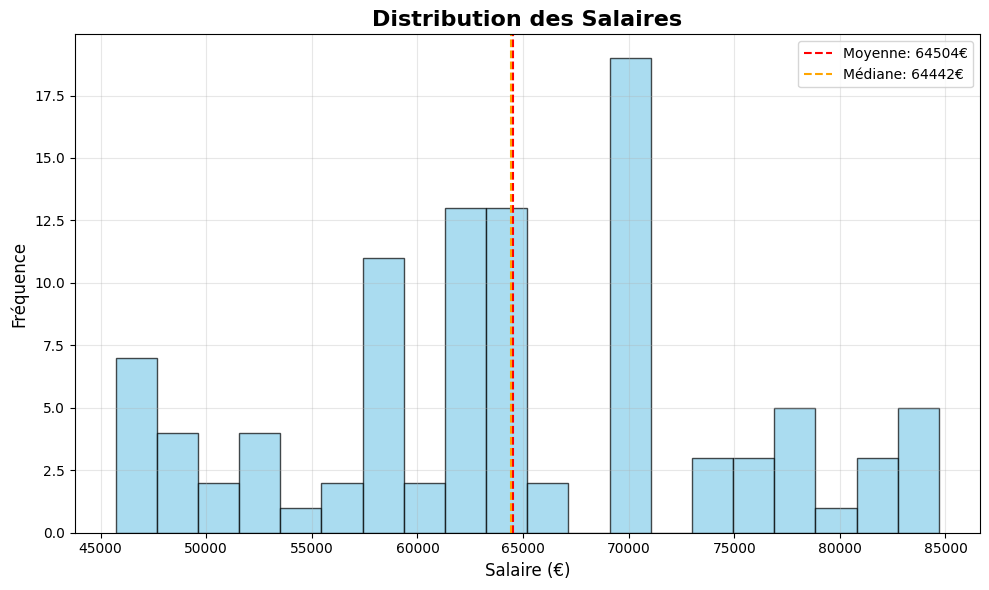

In [6]:
# 20a. Distribution des salaires
plt.figure(figsize=(10, 6))
plt.hist(df['Salary'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution des Salaires', fontsize=16, fontweight='bold')
plt.xlabel('Salaire (€)', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.grid(True, alpha=0.3)
plt.axvline(df['Salary'].mean(), color='red', linestyle='--', label=f'Moyenne: {df["Salary"].mean():.0f}€')
plt.axvline(df['Salary'].median(), color='orange', linestyle='--', label=f'Médiane: {df["Salary"].median():.0f}€')
plt.legend()
plt.tight_layout()
plt.show()

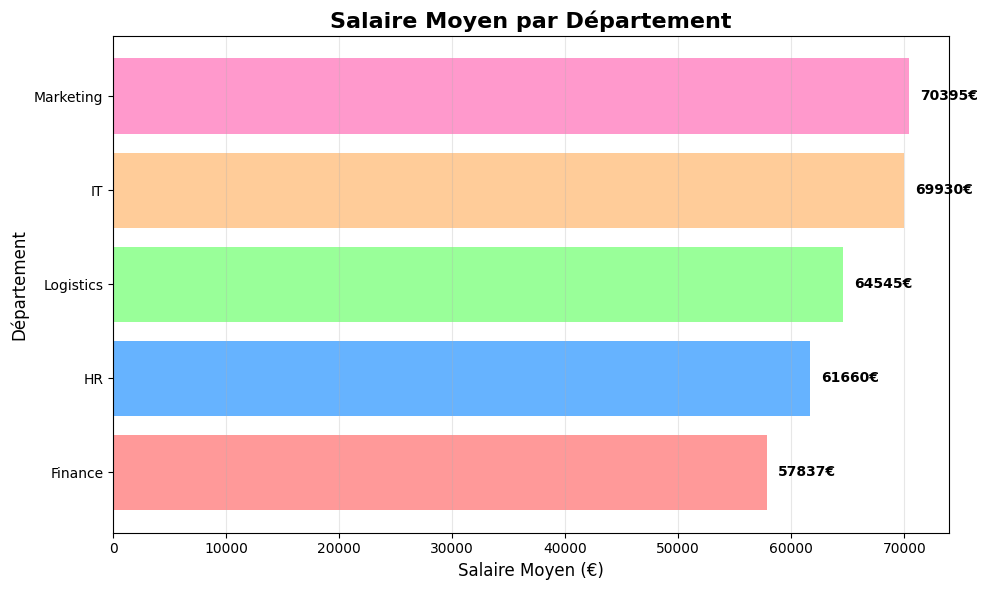

In [7]:
# 20b. Barplot des salaires moyens par département
plt.figure(figsize=(10, 6))
salaire_par_dept = df.groupby('Department')['Salary'].mean().sort_values(ascending=True)
bars = plt.barh(salaire_par_dept.index, salaire_par_dept.values, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc'])

plt.title('Salaire Moyen par Département', fontsize=16, fontweight='bold')
plt.xlabel('Salaire Moyen (€)', fontsize=12)
plt.ylabel('Département', fontsize=12)

# Ajouter les valeurs sur les barres
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 1000, bar.get_y() + bar.get_height()/2, f'{width:.0f}€', 
             ha='left', va='center', fontweight='bold')

plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

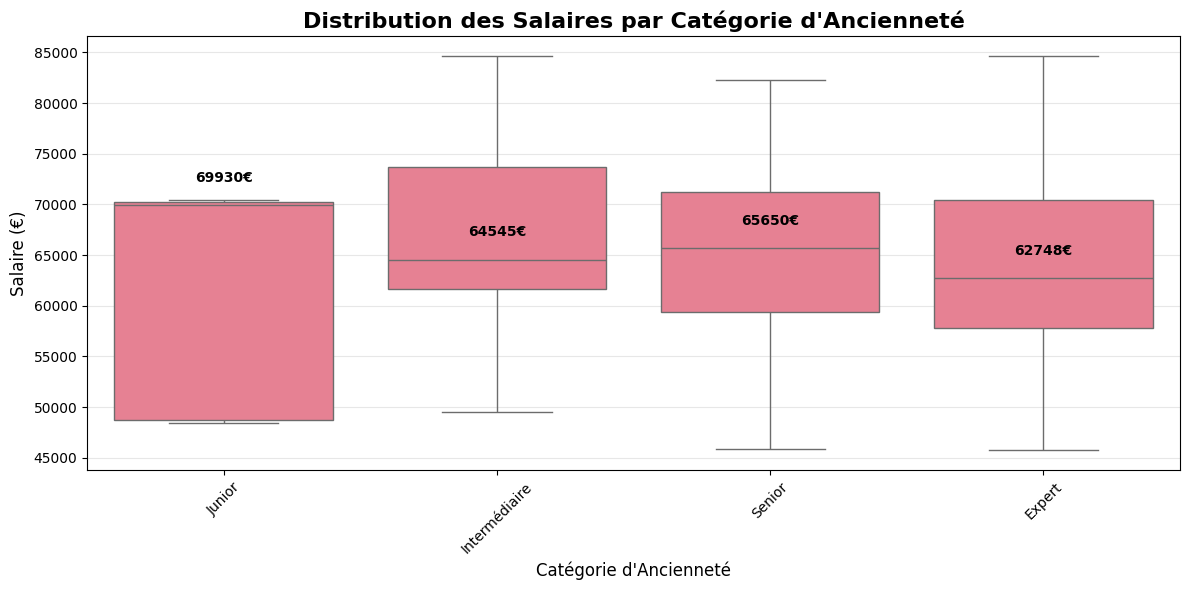

In [13]:
# 20c. Boxplot des salaires par catégorie d'ancienneté
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Ancienneté_Catégorie', y='Salary', 
            order=['Junior', 'Intermédiaire', 'Senior', 'Expert'])

plt.title('Distribution des Salaires par Catégorie d\'Ancienneté', fontsize=16, fontweight='bold')
plt.xlabel('Catégorie d\'Ancienneté', fontsize=12)
plt.ylabel('Salaire (€)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

# Ajouter des statistiques
for i, category in enumerate(['Junior', 'Intermédiaire', 'Senior', 'Expert']):
    if category in df['Ancienneté_Catégorie'].values:
        median_val = df[df['Ancienneté_Catégorie'] == category]['Salary'].median()
        plt.text(i, median_val + 2000, f'{median_val:.0f}€', 
                ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

### Interprétation des visualisations :
- La distribution des salaires suit une forme relativement normale avec une légère asymétrie vers la droite
- La moyenne (64,504€) et la médiane (64,442€) sont très proches, confirmant une distribution équilibrée
- Le barplot révèle clairement la hiérarchie salariale : Marketing en tête, Finance en queue
- Les écarts entre départements sont significatifs : 12,558€ entre Marketing et Finance
- Le boxplot d'ancienneté montre des médianes similaires mais des dispersions variables selon les catégories
- Les Intermédiaires ont la médiane la plus basse (64,545€) malgré leur niveau d'expérience

## Conclusion

Cette analyse complète des employés de l'entreprise tech révèle plusieurs insights clés :

**Structure des données :**
- Dataset bien structuré avec 100 employés répartis sur 5 départements
- Gestion efficace des valeurs manquantes avec des stratégies appropriées
- Création de variables catégorielles enrichissant l'analyse

**Observations principales :**
- Salaire moyen de 64,504€ avec une distribution équilibrée
- Prédominance du télétravail (55%) et d'employés expérimentés (58% d'experts)
- Inégalités salariales entre départements (Marketing > IT > Logistics > HR > Finance)
- Paradoxe : les Intermédiaires gagnent plus que les Experts en moyenne

**Recommandations :**
- Revoir la grille salariale pour harmoniser la rémunération par ancienneté
- Analyser les écarts salariaux importants au sein des départements
- Optimiser la politique de télétravail selon les départements
- Investiguer les facteurs expliquant les disparités observées